# Matplotlib - visualisation

## Bivariate Analysis
 - Anaysing two variables at once
 
 
#### Categorical with Categorical
     - crosstab to get frequency or aggregate of any other numerical column
     - Visualisation - HeatMaps or stacked Charts
     
#### Categorical With Numerical
      - Groupby and aggregation
      - Visualisation: Bar charts/Pie Charts

#### Numerical with Numerical
       - Correlation Analysis
       - Scatter Plots
        

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
df  = pd.read_csv("C:/Users/kavin/Downloads/car_data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [29]:
df.columns
df.shape

(301, 9)

In [30]:
df["Owner"].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

## Plot

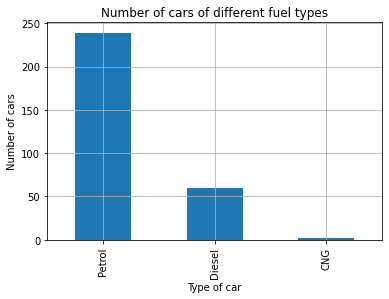

In [42]:
## make an plot for Fuel Type

plt.figure(figsize = (6, 4))
df["Fuel_Type"].value_counts().plot(kind = 'bar')
plt.title("Number of cars of different fuel types")
plt.xlabel("Type of car")
plt.ylabel("Number of cars")
plt.grid()

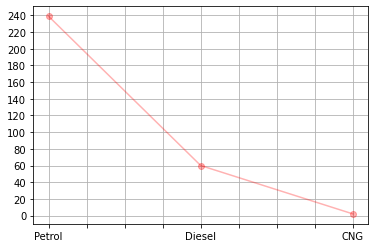

In [43]:
df["Fuel_Type"].value_counts().plot(marker = "o", 
                                    color = "r",
                                    alpha = 0.3)
plt.yticks(np.arange(0,250, 20))
plt.grid()
plt.show()

In [44]:
print(df["Fuel_Type"].value_counts().index)
print(df["Fuel_Type"].value_counts().values)

Index(['Petrol', 'Diesel', 'CNG'], dtype='object')
[239  60   2]


## Bar chart

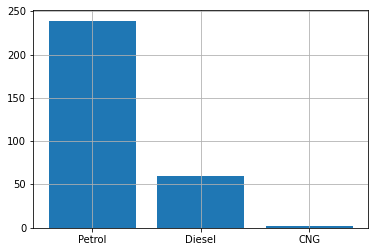

In [58]:
## Make a  for Fuel type 

plt.bar(df["Fuel_Type"].value_counts().index, df["Fuel_Type"].value_counts().values )
plt.grid()

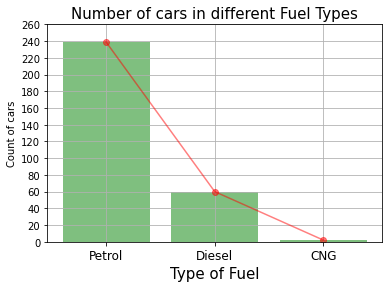

In [59]:
## Make a bar chart for Fuel type and the value_counts

plt.figure(figsize = (6,4))

plt.bar(df["Fuel_Type"].value_counts().index,
        df["Fuel_Type"].value_counts().values,
         color = "g",
         alpha = 0.5
       )

plt.plot(df["Fuel_Type"].value_counts().index,
        df["Fuel_Type"].value_counts().values,
         marker = "o",
         color = "r",
         alpha = 0.5
       )


plt.xticks(fontsize = 12)
plt.xlabel("Type of Fuel", fontsize = 15)

plt.ylabel("Count of cars")
plt.yticks((range(0,270,20)))



plt.title("Number of cars in different Fuel Types", fontsize = 15)
plt.grid()

In [60]:
(df["Fuel_Type"].value_counts().index)

Index(['Petrol', 'Diesel', 'CNG'], dtype='object')

## Histogram 

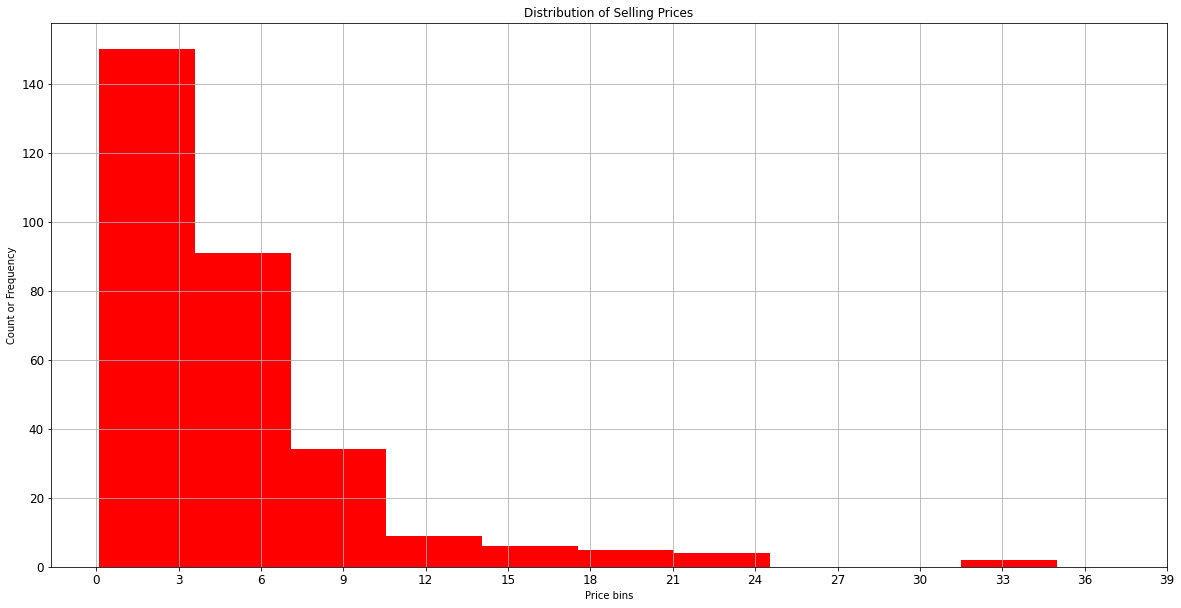

In [63]:
## Make a Histogram for Sellingb Price

plt.figure(figsize = (20,10))
plt.hist(df["Selling_Price"], color = "red", bins = 10)
plt.title("Distribution of Selling Prices")
plt.xticks(list(range(0,40, 3))   ,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Price bins")
plt.ylabel("Count or Frequency")
plt.grid()




##  Boxplots

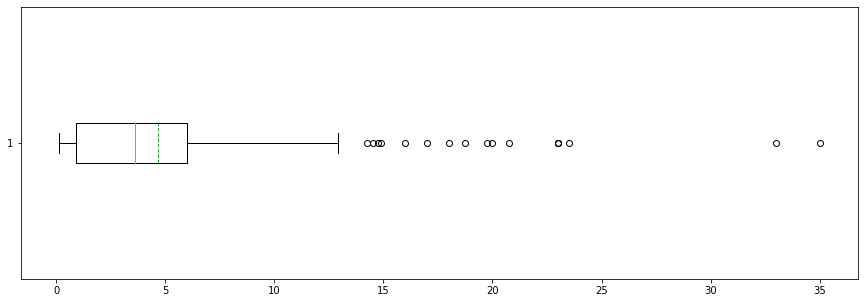

In [68]:
## Make a BoxPlot for Sellingb Price
%matplotlib inline
plt.figure(figsize = (15,5))
plt.boxplot(df["Selling_Price"], vert = False, showmeans = True, meanline = True)
plt.show()

## Heatmaps

<AxesSubplot:xlabel='Transmission', ylabel='Fuel_Type'>

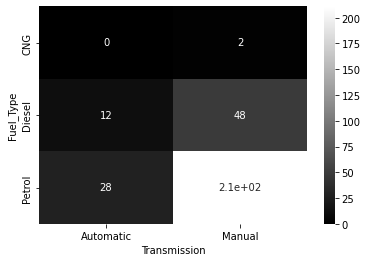

In [75]:
# Make a heatmaps for Fuel_type and Tranbsmission

sns.heatmap(pd.crosstab(df["Fuel_Type"], 
                        df["Transmission"]),
           annot = True,
           cmap = 'gray')

In [76]:
# categorical with categorical variable visualisation using Heatmaps


df[["Selling_Price","Present_Price","Kms_Driven"]].corr()

,Selling_Price,Present_Price,Kms_Driven
Selling_Price,1.000000,0.878983,0.029187
Present_Price,0.878983,1.000000,0.203647
Kms_Driven,0.029187,0.203647,1.000000


<AxesSubplot:>

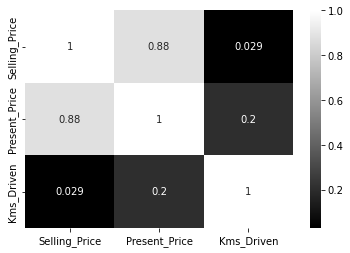

In [77]:
sns.heatmap(df[["Selling_Price","Present_Price","Kms_Driven"]].corr(),
            cmap = "gray",
            cbar = True,
           annot = True)

## Cross Tab

In [79]:
cross_tab = pd.crosstab(df["Fuel_Type"], df["Transmission"])
cross_tab

Transmission,Automatic,Manual
Fuel_Type,,
CNG,0,2
Diesel,12,48
Petrol,28,211


## stacked chart

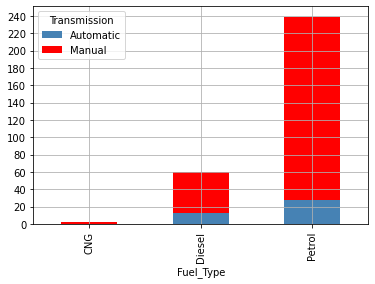

In [81]:
# Make a stacked chart for using Cross_tab

cross_tab.plot(kind='bar', stacked=True, color=['steelblue', 'red'])
plt.yticks(np.arange(0,250,20))
plt.grid()
plt.show()

## Scatter Plot

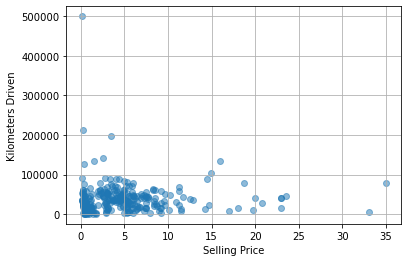

In [82]:
## Make a ScatterPlot

plt.scatter(df["Selling_Price"],df["Kms_Driven"], alpha = 0.5)
plt.xlabel("Selling Price")
plt.ylabel("Kilometers Driven")
plt.grid()